<a href="https://colab.research.google.com/github/W-Srikongpan/DPDM2023/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Classification

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Data Preparation

In [2]:
import pandas as pd
import numpy as np

Number of Instances: 690

Number of Attributes: 15 + class attribute

Attribute Information:

    A1:	b, a.
    A2:	continuous.
    A3:	continuous.
    A4:	u, y, l, t.
    A5:	g, p, gg.
    A6:	c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
    A7:	v, h, bb, j, n, z, dd, ff, o.
    A8:	continuous.
    A9:	t, f.
    A10:	t, f.
    A11:	continuous.
    A12:	t, f.
    A13:	g, p, s.
    A14:	continuous.
    A15:	continuous.
    A16: +,-         (class attribute)

 Missing Attribute Values:
    37 cases (5%) have one or more missing values.  The missing
    values from particular attributes are:

    A1:  12
    A2:  12
    A4:   6
    A5:   6
    A6:   9
    A7:   9
    A14: 13

Class Distribution
  
    +: 307 (44.5%)
    -: 383 (55.5%)


In [3]:
col_name = ['a1','a2','a3','a4','a5','a6','a7','a8','a9',
            'a10','a11','a12','a13','a14','a15','a16']

In [4]:
credit = pd.read_csv('/content/drive/MyDrive/DPDM2023_DATA/crx.data',header = None,names = col_name)

In [5]:
print(credit.shape)
credit.head()

(690, 16)


,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [6]:
credit = credit[['a3','a8','a9','a10','a11','a12','a13','a15','a16']]

In [7]:
credit.isnull().any() #check null

a3     False
a8     False
a9     False
a10    False
a11    False
a12    False
a13    False
a15    False
a16    False
dtype: bool

preeprocessing

In [8]:
credit = credit.replace({'t':1,'f':0,'g':1,'p':2,'s':3,'+':1,'-':0})
#change tesx to number >> t is 1, f is 0
credit

,a3,a8,a9,a10,a11,a12,a13,a15,a16
0,0.000,1.25,1,1,1,0,1,0,1
1,4.460,3.04,1,1,6,0,1,560,1
2,0.500,1.50,1,0,0,0,1,824,1
3,1.540,3.75,1,1,5,1,1,3,1
4,5.625,1.71,1,0,0,0,3,0,1
...,...,...,...,...,...,...,...,...,...
685,10.085,1.25,0,0,0,0,1,0,0
686,0.750,2.00,0,1,2,1,1,394,0
687,13.500,2.00,0,1,1,1,1,1,0
688,0.205,0.04,0,0,0,0,1,750,0


##Try simple ML

In [9]:
import numpy as np

In [10]:
np.random.seed(seed = 1 ) #set seed = 1

In [11]:
a = np.random.randint(2,size = len(credit),) #random number 0 and 1 ,size 690
a

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,

In [12]:
train = credit[a==1] #let a = 1 is train
train.shape

(324, 9)

In [13]:
test = credit[a==0] #let a = 0 is test
test.shape

(366, 9)

#Start Decision Tree

###Import

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

##Defind

In [15]:
Dtreet1 =  DecisionTreeClassifier(random_state=0)
Dtreet1

DecisionTreeClassifier(random_state=0)

##Train

In [16]:
X_train = train.iloc[:,:-1] #let train x and y
Y_train = train.iloc[:,-1]

In [17]:
Dtreet1 = Dtreet1.fit(X_train,Y_train)
Dtreet1

DecisionTreeClassifier(random_state=0)

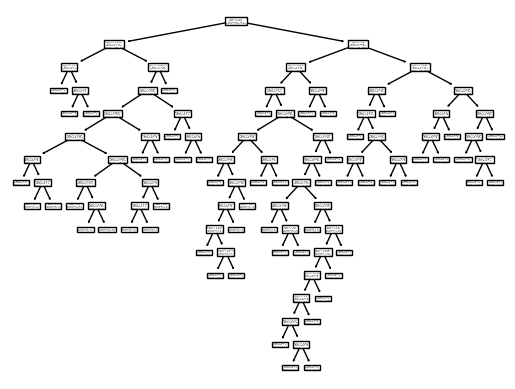

In [18]:
tree.plot_tree(Dtreet1); #plot decision tree

##Test


In [19]:
X_test = test.iloc[:,:-1] #let test x and y
Y_test = test.iloc[:,-1]

In [20]:
y_predict = Dtreet1.predict(X_test) #predict y from X_test

In [21]:
y_predict

array([0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, y_predict) #accuracy by y test and y predict

0.825136612021858

## Set parameter

###Import


In [23]:
from sklearn.tree import DecisionTreeClassifier

###Defind

In [24]:
Dtreet2 = DecisionTreeClassifier(random_state=0, max_depth=4) #Add max_depth=4 is version 2

###train

In [25]:
Dtreet2 = Dtreet2.fit(X_train,Y_train)

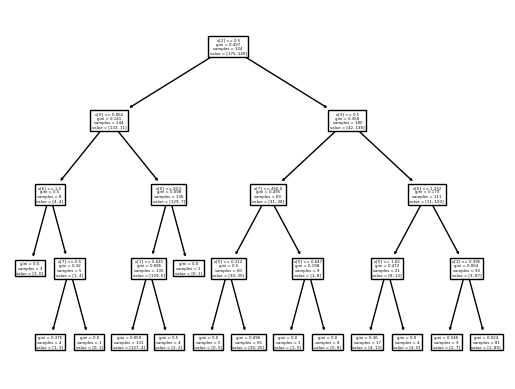

In [26]:
tree.plot_tree(Dtreet2); #plot decision tree

###Test

In [27]:
y_predic2 = Dtreet2.predict(X_test)

In [28]:
accuracy_score(Y_test,y_predic2) #if let max_depth=4 have accuracy better than version 1

0.8579234972677595

# HW 5

build a decision tree model which has better accurancy than 0.86 and descibe about parameters you set

##Import


In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import numpy as np

##Solution


In [30]:
scores_acc = []

for max_depth in range(1,11):
    #defind
    Dtree = DecisionTreeClassifier(random_state=0, max_depth=max_depth)
    #train
    Dtree2 = Dtree.fit(X_train, Y_train)
    #test
    y_predic = Dtree2.predict(X_test)
    scores = accuracy_score(Y_test, y_predic)
    scores_acc.append(scores)
    print(f"max_depth={max_depth}, Accuracy={scores}")

max_depth=1, Accuracy=0.8715846994535519
max_depth=2, Accuracy=0.8715846994535519
max_depth=3, Accuracy=0.8633879781420765
max_depth=4, Accuracy=0.8579234972677595
max_depth=5, Accuracy=0.8688524590163934
max_depth=6, Accuracy=0.8442622950819673
max_depth=7, Accuracy=0.8497267759562842
max_depth=8, Accuracy=0.8306010928961749
max_depth=9, Accuracy=0.8278688524590164
max_depth=10, Accuracy=0.8114754098360656


In [31]:
max_scores = np.max(scores_acc)
print("Maximum Accuracy:", max_scores)

Maximum Accuracy: 0.8715846994535519


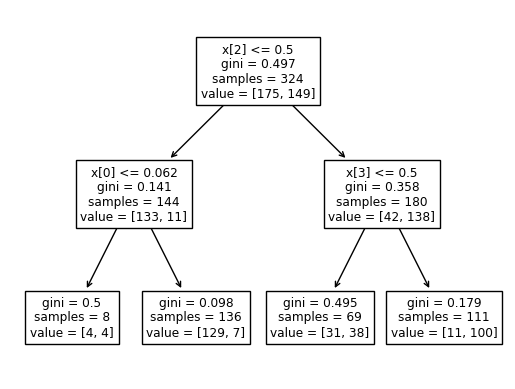

In [32]:
Dtree = DecisionTreeClassifier(random_state=0, max_depth=2)
Dtree2 = Dtree.fit(X_train, Y_train)
tree.plot_tree(Dtree2);

The accuaracy will increase. Therefore the accuracy is 0.8715846994535519

DecisionTreeClassifier

    DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0

##Solution

In [33]:
scores_acc2 = []

for max_depth in range(1,6):
    for i in range(2, 51):
        # Define
        Dtree = DecisionTreeClassifier(random_state=0, max_depth=max_depth, min_samples_split=i)

        # Train
        Dtree2 = Dtree.fit(X_train, Y_train)

        # Test
        y_predic = Dtree2.predict(X_test)


        scores = accuracy_score(Y_test, y_predic)
        scores_acc2.append(scores)
        print(f"max_depth={max_depth}, min_samples_split={i}, Accuracy={scores}")

max_depth=1, min_samples_split=2, Accuracy=0.8715846994535519
max_depth=1, min_samples_split=3, Accuracy=0.8715846994535519
max_depth=1, min_samples_split=4, Accuracy=0.8715846994535519
max_depth=1, min_samples_split=5, Accuracy=0.8715846994535519
max_depth=1, min_samples_split=6, Accuracy=0.8715846994535519
max_depth=1, min_samples_split=7, Accuracy=0.8715846994535519
max_depth=1, min_samples_split=8, Accuracy=0.8715846994535519
max_depth=1, min_samples_split=9, Accuracy=0.8715846994535519
max_depth=1, min_samples_split=10, Accuracy=0.8715846994535519
max_depth=1, min_samples_split=11, Accuracy=0.8715846994535519
max_depth=1, min_samples_split=12, Accuracy=0.8715846994535519
max_depth=1, min_samples_split=13, Accuracy=0.8715846994535519
max_depth=1, min_samples_split=14, Accuracy=0.8715846994535519
max_depth=1, min_samples_split=15, Accuracy=0.8715846994535519
max_depth=1, min_samples_split=16, Accuracy=0.8715846994535519
max_depth=1, min_samples_split=17, Accuracy=0.8715846994535519


In [34]:
max_scores2 = np.max(scores_acc2)
print("Maximum Accuracy:", max_scores2)

Maximum Accuracy: 0.8825136612021858


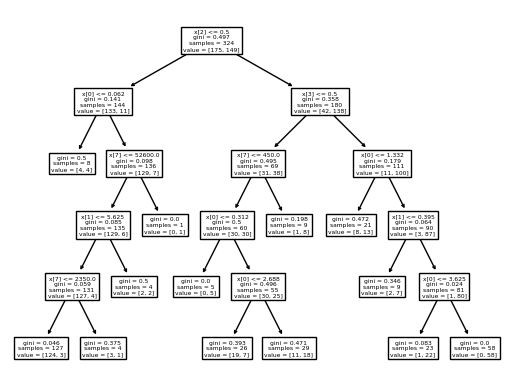

In [35]:
#by ax_depth=5, min_samples_split=22, Accuracy=0.8825136612021858
Dtree = DecisionTreeClassifier(random_state=0, max_depth=5 , min_samples_split=22)
Dtree2 = Dtree.fit(X_train, Y_train)
tree.plot_tree(Dtree2);

The accuaracy will increase. Therefore the best accuracy is 0.8825136612021858

# HW6 Build 5 Classification as folllows;

- decision tree with 3 model
- Naive bayes 1 Model
- Unique Technique 1 Model


Use credit data

In [36]:
credit

,a3,a8,a9,a10,a11,a12,a13,a15,a16
0,0.000,1.25,1,1,1,0,1,0,1
1,4.460,3.04,1,1,6,0,1,560,1
2,0.500,1.50,1,0,0,0,1,824,1
3,1.540,3.75,1,1,5,1,1,3,1
4,5.625,1.71,1,0,0,0,3,0,1
...,...,...,...,...,...,...,...,...,...
685,10.085,1.25,0,0,0,0,1,0,0
686,0.750,2.00,0,1,2,1,1,394,0
687,13.500,2.00,0,1,1,1,1,1,0
688,0.205,0.04,0,0,0,0,1,750,0


In [37]:
np.random.seed(seed = 100) #set seed 100
a = np.random.randint(2,size = len(credit),) #random number 0 and 1 ,size 690
a

array([0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,

In [38]:
Train = credit[a==1] #let a = 1 is train
Train.shape

(343, 9)

In [39]:
Test = credit[a==0] #let a = 0 is test
Test.shape

(347, 9)

Let Train and Test

In [40]:
X_Train = Train.iloc[:,:-1] #Let train
Y_Train = Train.iloc[:,-1]
X_Test = Test.iloc[:,:-1] #Let test
Y_Test = Test.iloc[:,-1]

train -> train, Validation

In [41]:
from sklearn.model_selection import train_test_split
X_Traintrain, X_Val, Y_Traintrain, Y_Val = train_test_split(X_Train, Y_Train, test_size=0.20, random_state=6)

##Decision Tree

Import

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

### Model 1


Define

In [43]:
Dtree1 = DecisionTreeClassifier(random_state = 0)
Dtree1

DecisionTreeClassifier(random_state=0)

Train

In [44]:
Dtree1 = Dtree1.fit(X_Traintrain,Y_Traintrain)
Dtree1

DecisionTreeClassifier(random_state=0)

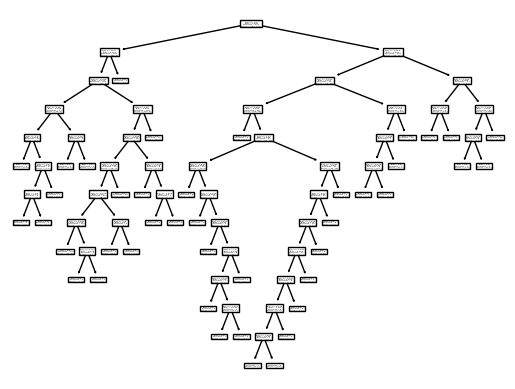

In [45]:
tree.plot_tree(Dtree1);

Test

In [46]:
Y_predic1 = Dtree1.predict(X_Val)
accuracy_score(Y_Val, Y_predic1)

0.7971014492753623

###Model 2


Define

In [47]:
Dtree2 = DecisionTreeClassifier(random_state = 0 , max_depth = 4)
Dtree2

DecisionTreeClassifier(max_depth=4, random_state=0)

Train

In [48]:
Dtree2 = Dtree2.fit(X_Traintrain,Y_Traintrain)
Dtree2

DecisionTreeClassifier(max_depth=4, random_state=0)

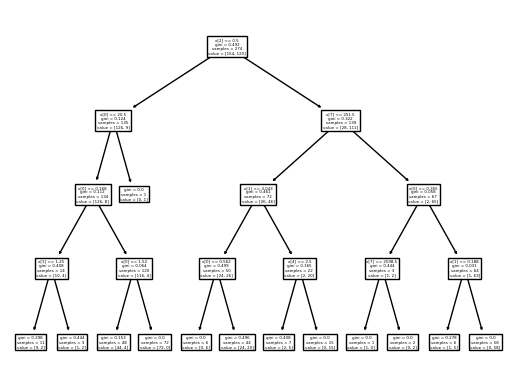

In [49]:
tree.plot_tree(Dtree2);

Test

In [50]:
Y_predic2 = Dtree2.predict(X_Val)
accuracy_score(Y_Val, Y_predic2)

0.8260869565217391

### Model 3

Defind

In [51]:
Dtree3 = DecisionTreeClassifier(random_state = 0 , max_depth = 5 , min_samples_split=25 )
Dtree3

DecisionTreeClassifier(max_depth=5, min_samples_split=25, random_state=0)

Train

In [52]:
Dtree3 = Dtree3.fit(X_Traintrain,Y_Traintrain)
Dtree3

DecisionTreeClassifier(max_depth=5, min_samples_split=25, random_state=0)

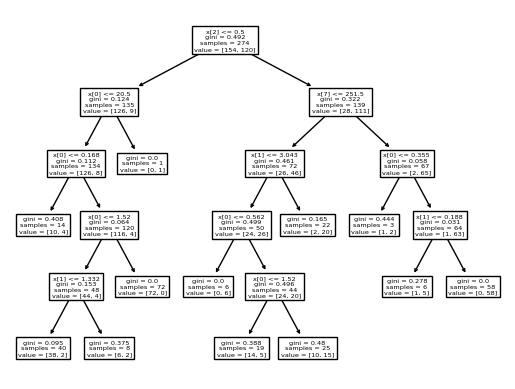

In [53]:
tree.plot_tree(Dtree3);

Test

In [54]:
Y_predic3 = Dtree3.predict(X_Val)
accuracy_score(Y_Val, Y_predic3)

0.8695652173913043

## Naive bayes 1 Model

Gaussian Naive Bayes (GaussianNB).

    GaussianNB(*, priors=None, var_smoothing=1e-09)

Import

In [55]:
from sklearn.naive_bayes import GaussianNB

Define

In [56]:
Gauss = GaussianNB()
Gauss

GaussianNB()

Train

In [57]:
Gauss = Gauss.fit(X_Traintrain,Y_Traintrain)
Gauss

GaussianNB()

Test

In [58]:
Y_predic4 = Gauss.predict(X_Val)
accuracy_score(Y_Val, Y_predic4)

0.8260869565217391

## Unique Technique 1 Model

Artificial Neural Network

    tf.keras.models.Sequentia(layers=None, name=None)

Import

In [59]:
import tensorflow as tf
from sklearn.metrics import accuracy_score

Define

In [60]:
ann = tf.keras.models.Sequential()
ann

Model ANN

In [61]:
#Adding First Hidden Layer
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))
#Adding Second Hidden Layer
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))
#Adding Output Layer
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

In [62]:
#Compiling ANN
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

Train

In [63]:
#Fitting ANN
history = ann.fit(X_Traintrain,Y_Traintrain,batch_size=32,epochs = 100)

Epoch 1/100
9/9 [==============================] - 1s 5ms/step - loss: 243.4933 - accuracy: 0.5620
Epoch 2/100
9/9 [==============================] - 0s 5ms/step - loss: 228.7302 - accuracy: 0.5584
Epoch 3/100
9/9 [==============================] - 0s 4ms/step - loss: 212.9233 - accuracy: 0.5511
Epoch 4/100
9/9 [==============================] - 0s 4ms/step - loss: 198.2732 - accuracy: 0.5511
Epoch 5/100
9/9 [==============================] - 0s 4ms/step - loss: 183.8340 - accuracy: 0.5511
Epoch 6/100
9/9 [==============================] - 0s 4ms/step - loss: 171.5874 - accuracy: 0.5401
Epoch 7/100
9/9 [==============================] - 0s 3ms/step - loss: 156.1572 - accuracy: 0.5292
Epoch 8/100
9/9 [==============================] - 0s 4ms/step - loss: 144.5054 - accuracy: 0.5255
Epoch 9/100
9/9 [==============================] - 0s 3ms/step - loss: 133.7218 - accuracy: 0.5182
Epoch 10/100
9/9 [==============================] - 0s 4ms/step - loss: 123.0130 - accuracy: 0.5073
Epoch 11/

Test

In [64]:
Y_predic5 = ann.predict(X_Val)

3/3 [==============================] - 0s 4ms/step


In [65]:
# Convert probabilities to binary class labels using a threshold (e.g., 0.5)
threshold = 0.5
Y_predic5 = (Y_predic5 > threshold).astype(int)

In [66]:
accuracy_score(Y_Val, Y_predic5)

0.6811594202898551

Ref : [https://www.analyticsvidhya.com/blog/2021/10/implementing-artificial-neural-networkclassification-in-python-from-scratch/](https://)

##Validate model

In [67]:
Y_predic1 = Dtree1.predict(X_Val)
accuracy_score(Y_Val, Y_predic1)

0.7971014492753623

In [68]:
Y_predic2 = Dtree2.predict(X_Val)
accuracy_score(Y_Val, Y_predic2)

0.8260869565217391

In [69]:
Y_predic3 = Dtree3.predict(X_Val)
accuracy_score(Y_Val, Y_predic3)

0.8695652173913043

In [70]:
Y_predic4 = Gauss.predict(X_Val)
accuracy_score(Y_Val, Y_predic4)

0.8260869565217391

In [71]:
threshold = 0.5
Y_predic5 = (Y_predic5 > threshold).astype(int)
accuracy_score(Y_Val, Y_predic5)

0.6811594202898551

##Evaluation
Retrain model with full training data

model1

In [72]:
Dtree1full = DecisionTreeClassifier(random_state = 0)
Dtree1full = Dtree1full.fit(X_Train,Y_Train)
Y_predic1full = Dtree1full.predict(X_Test)
accuracy_score(Y_Test, Y_predic1full)

0.8155619596541787

model2

In [73]:
Dtree2full = DecisionTreeClassifier(random_state = 0 , max_depth = 4)
Dtree2full = Dtree2full.fit(X_Train,Y_Train)
Y_predic2full = Dtree2full.predict(X_Test)
accuracy_score(Y_Test, Y_predic2full)

0.8328530259365994

model3

In [74]:
Dtree3full = DecisionTreeClassifier(random_state = 0 , max_depth = 5 , min_samples_split=25)
Dtree3full = Dtree3full.fit(X_Train,Y_Train)
Y_predic3full = Dtree3full.predict(X_Test)
accuracy_score(Y_Test, Y_predic3full)

0.8501440922190202

model4

In [75]:
Gaussfull = GaussianNB()
Gaussfull = Gaussfull.fit(X_Train,Y_Train)
Y_predic4full = Gaussfull.predict(X_Test)
accuracy_score(Y_Test, Y_predic4full)

0.7550432276657061

model5

In [76]:
annfull = tf.keras.models.Sequential()
annfull.add(tf.keras.layers.Dense(units=6,activation="relu"))
annfull.add(tf.keras.layers.Dense(units=6,activation="relu"))
annfull.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
annfull.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])
annfull.fit(X_Train,Y_Train,batch_size=32,epochs = 100)

Epoch 1/100
11/11 [==============================] - 1s 3ms/step - loss: 9.7945 - accuracy: 0.4286
Epoch 2/100
11/11 [==============================] - 0s 4ms/step - loss: 6.1528 - accuracy: 0.4781
Epoch 3/100
11/11 [==============================] - 0s 2ms/step - loss: 3.1093 - accuracy: 0.6006
Epoch 4/100
11/11 [==============================] - 0s 3ms/step - loss: 1.1014 - accuracy: 0.6064
Epoch 5/100
11/11 [==============================] - 0s 2ms/step - loss: 1.0183 - accuracy: 0.6531
Epoch 6/100
11/11 [==============================] - 0s 2ms/step - loss: 0.8566 - accuracy: 0.6152
Epoch 7/100
11/11 [==============================] - 0s 2ms/step - loss: 0.8625 - accuracy: 0.6443
Epoch 8/100
11/11 [==============================] - 0s 3ms/step - loss: 0.8353 - accuracy: 0.6793
Epoch 9/100
11/11 [==============================] - 0s 2ms/step - loss: 0.8348 - accuracy: 0.6268
Epoch 10/100
11/11 [==============================] - 0s 2ms/step - loss: 0.8450 - accuracy: 0.6851
Epoch 11/

In [77]:
Y_predic5full = annfull.predict(X_Test)
threshold = 0.5
Y_predic5full = (Y_predic5full > threshold).astype(int)
accuracy_score(Y_Test, Y_predic5full)

11/11 [==============================] - 0s 2ms/step


0.7348703170028819